In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import seaborn as sns
import networkx as nx

In [ ]:
N = 10
p = 0.2  # probability of connection between i,j: i-->j
adj_matrix = bernoulli.rvs(p, size=(N,N))
np.fill_diagonal(adj_matrix, 0)
print(adj_matrix)

[[0 0 1 0 0 1 1 0 0 1]
 [1 0 0 0 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0 0]
 [0 0 0 0 1 1 0 1 0 1]
 [0 0 1 0 0 0 0 0 1 0]]


<AxesSubplot:>

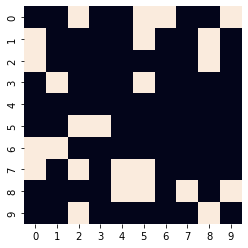

In [ ]:
sns.heatmap(adj_matrix, cbar=False, square=True)

In [ ]:
adj_list = {ni: np.where(neighbors)[0] for ni, neighbors in enumerate(adj_matrix)}
adj_list

{0: array([2, 5, 6, 9]),
 1: array([0, 5, 8]),
 2: array([0, 8]),
 3: array([1, 5]),
 4: array([], dtype=int64),
 5: array([2, 3]),
 6: array([0, 1]),
 7: array([0, 2, 4, 5]),
 8: array([4, 5, 7, 9]),
 9: array([2, 8])}

In [ ]:
[(node, neighbor) for node in adj_list for neighbor in adj_list[node]]

[(0, 2),
 (0, 5),
 (0, 6),
 (0, 9),
 (1, 0),
 (1, 5),
 (1, 8),
 (2, 0),
 (2, 8),
 (3, 1),
 (3, 5),
 (5, 2),
 (5, 3),
 (6, 0),
 (6, 1),
 (7, 0),
 (7, 2),
 (7, 4),
 (7, 5),
 (8, 4),
 (8, 5),
 (8, 7),
 (8, 9),
 (9, 2),
 (9, 8)]

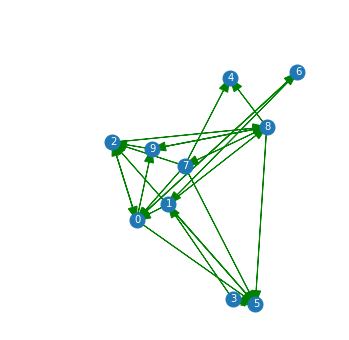

In [ ]:
def draw_edge(a, b, hw = 0):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color="green"
              )

x = np.random.random(size=N)*2  # uniform distribution
y = np.random.random(size=N)*2

plt.figure(figsize=(6,6))
plt.plot(x, y, '.', ms=30)
l = plt.xlim(-0.1,2.1)
l = plt.ylim(-0.1,2.1)
plt.axis('off')
for i in range(N):
    plt.text(x[i]-0.015, y[i]-0.015, i, c='w')
e = [draw_edge([x[a], y[a]], [x[b], y[b]], 0.06) for a in adj_list for b in adj_list[a]]

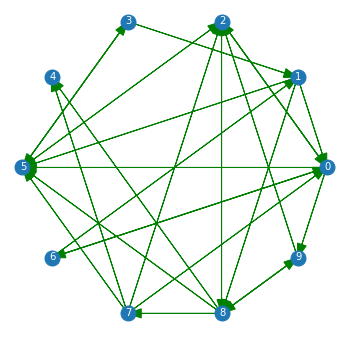

In [ ]:
def draw_edge(a, b, hw = 0):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color="green"
              )

t = np.linspace(0, 2*np.pi, N, endpoint=False)

x = np.cos(t)
y = np.sin(t)

plt.figure(figsize=(6,6))
plt.plot(x, y, '.', ms=30)
plt.axis('off')
for i in range(N):
    plt.text(x[i]-0.015, y[i]-0.015, i, c='w')
e = [draw_edge([x[a], y[a]], [x[b], y[b]], 0.06) for a in adj_list for b in adj_list[a]]

In [ ]:
N = 10
K = 4

Ring = []
for i in range(N):
    Ring += [[]]
    for k in range(K//2):
        Ring[i] += [i-(k+1), i+(k+1)]
Ring = np.array(Ring)
pos = np.where(Ring < 0)
Ring[pos] = Ring[pos] + N
pos = np.where(Ring >= N)
Ring[pos] = Ring[pos] - N
Ring

array([[9, 1, 8, 2],
       [0, 2, 9, 3],
       [1, 3, 0, 4],
       [2, 4, 1, 5],
       [3, 5, 2, 6],
       [4, 6, 3, 7],
       [5, 7, 4, 8],
       [6, 8, 5, 9],
       [7, 9, 6, 0],
       [8, 0, 7, 1]])

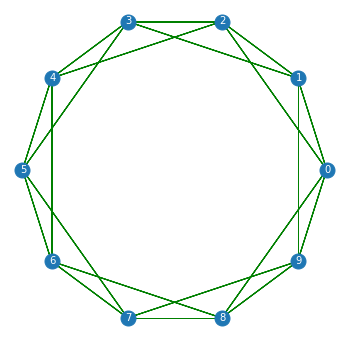

In [ ]:
adj_list = {ni: neighbors for ni, neighbors in enumerate(Ring)}

t = np.linspace(0, 2*np.pi, N, endpoint=False)

x = np.cos(t)
y = np.sin(t)

plt.figure(figsize=(6,6))
plt.plot(x, y, '.', ms=30)
plt.axis('off')
for i in range(N):
    plt.text(x[i]-0.015, y[i]-0.015, i, c='w')
e = [draw_edge([x[a], y[a]], [x[b], y[b]], 0) for a in adj_list for b in adj_list[a]]

In [ ]:
adj_matrix = np.zeros((N, N), dtype='int')

for node in adj_list:
    for neighbor in adj_list[node]:
        adj_matrix[node, neighbor] = 1
adj_matrix

array([[0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

<AxesSubplot:>

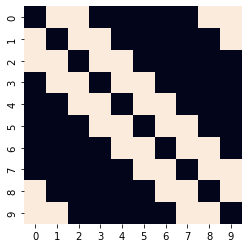

In [ ]:
sns.heatmap(adj_matrix, cbar=False, square=True)

# TO DO

- Plot the Ring Matrix using seaborn, sns
- Try to implement a 1D small-world (Watts-Strogatz)
- Review the class materials, week 1 and 2.

Check: https://github.com/benmaier/smallworld

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

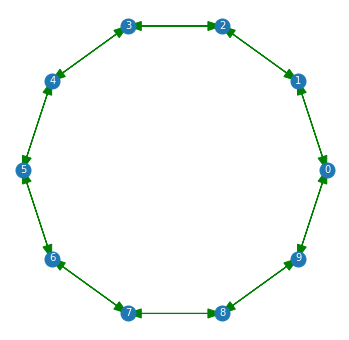

In [ ]:
def make_ring(N, K):
    Ring = []
    for i in range(N):
        Ring += [[]]
        for k in range(K//2):
            Ring[i] += [i-(k+1), i+(k+1)]
    Ring = np.array(Ring)
    # Correct borders
    pos = np.where(Ring < 0)
    Ring[pos] = Ring[pos] + N
    pos = np.where(Ring >= N)
    Ring[pos] = Ring[pos] - N
    return Ring 

def draw_edge(a, b, hw = 0, color='green'):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color=color
              )

def plot_circular_layout(adj_list, hw=0.0, rewired_arcs=None):
    t = np.linspace(0, 2*np.pi, N, endpoint=False)

    x = np.cos(t)
    y = np.sin(t)

    plt.figure(figsize=(6,6))
    plt.plot(x, y, '.', ms=30)
    plt.axis('off')
    for i in range(N):
        plt.text(x[i]-0.015, y[i]-0.015, i, c='w')
    e = [draw_edge([x[a], y[a]], [x[b], y[b]], hw) for a in adj_list for b in adj_list[a]]

    if rewired_arcs is not None:
        e = [draw_edge([x[a], y[a]], [x[b], y[b]], hw, 'red') for a in rewired_arcs for b in rewired_arcs[a]]

def rewire_ring(C, omega):
    rewired_arcs = {}
    # C: connectivity array, adajacency list
    # omega: probability of creating a random shortcuts (rewiring)
    all_nodes = set(range(len(C)))
    # loop over the network, i: index, ci: node
    for i, ci in enumerate(C):
        # loop over the neighborhood of ci, j: incex, cj: neighbor
        new_connections = []
        for j, cj in enumerate(ci):
            # rewire if U(0,1) < omega, omega: rewiring probability
            if np.random.random() < omega:
                available_nodes = list(all_nodes - (set([i] + list(ci)) - set([cj])))
                C[i, j] = np.random.choice(available_nodes)
                new_connections += [C[i, j]]
            rewired_arcs[i] = new_connections
    return rewired_arcs

C = make_ring(10 ,2)  # connectivity

rewired_arcs = rewire_ring(C, 0)

adj_list = {ni: neighbors for ni, neighbors in enumerate(C)}

plot_circular_layout(adj_list, hw=0.06, rewired_arcs=rewired_arcs)
rewired_arcs

In [ ]:
C = make_ring(5, 4)  # connectivity

rewired_arcs = rewire_ring(C, 0)

for i, ci in enumerate(C):
    print(i, ci)

0 [4 1 3 2]
1 [0 2 4 3]
2 [1 3 0 4]
3 [2 4 1 0]
4 [3 0 2 1]


In [ ]:
all_nodes = set(range(len(C)))
print(all_nodes)  # all nodes in network
node = 0  # selected node for rewiring neihborhood
print(set([node]))  # avoid self connection
print(set(C[node]))  # avoid actual neighborhood, duplicated connections
available_nodes = list(all_nodes - (set([node] + list(C[node])) - set([C[node][0]])))
available_nodes

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0}
{8, 9, 2, 1}


[3, 4, 5, 6, 7, 9]

In [ ]:
[C[node][0]]

[9]

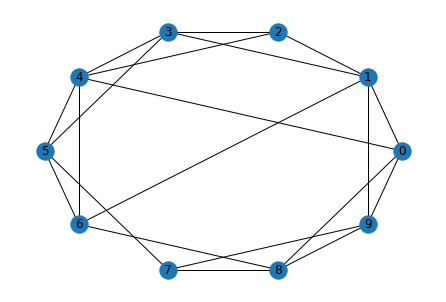

In [ ]:
G = nx.watts_strogatz_graph(10, 4, 0.1)
nx.draw_circular(G, with_labels = True)

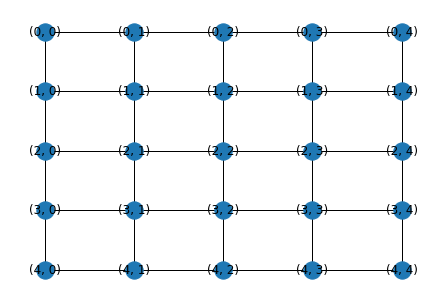

In [ ]:
G = nx.grid_2d_graph(5,5)
pos = {(x, y): (y, -x) for x,y in G.nodes}
nx.draw(G, with_labels=True, pos=pos)

In [ ]:
G[(2,2)]

AtlasView({(1, 2): {}, (3, 2): {}, (2, 1): {}, (2, 3): {}})

### Homework

- **Start with a 2D grid** 
  - See heatmap below for the adjacency matrix of a 2D grid with $N=\text{width} \times \text{height} = 100$ nodes, $\text{width} = \text{height}=10$.
  - The regular connectivity starts with $K=8$ connections per node. 

<AxesSubplot:>

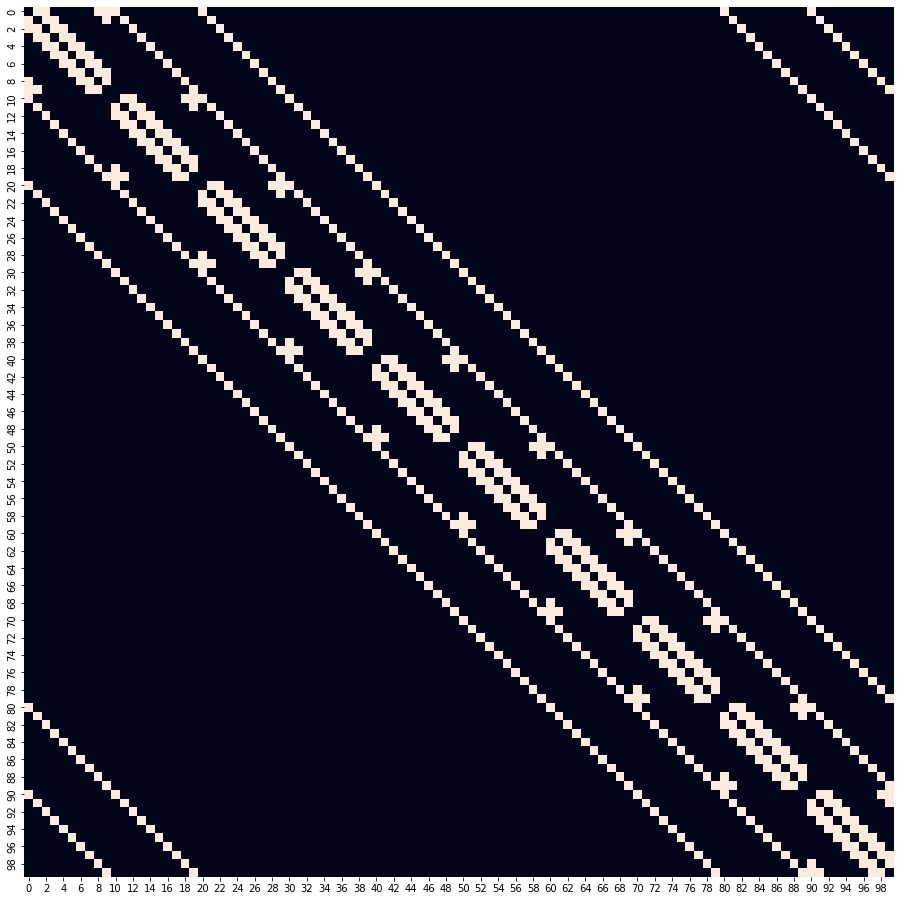

In [ ]:
# reading a dictionary from a file
with open('../grid.txt') as f:
    data = f.read()
      
# reconstructing the data as a dictionary
grid_2D = eval(data)

C = np.zeros((len(grid_2D), len(grid_2D)), dtype='int')  # adjacency matrix

for node in grid_2D: 
    for neighbor in grid_2D[node]:
        C[node, neighbor] = 1
plt.figure(figsize=(16,16))
sns.heatmap(C, cbar=False, square=True)

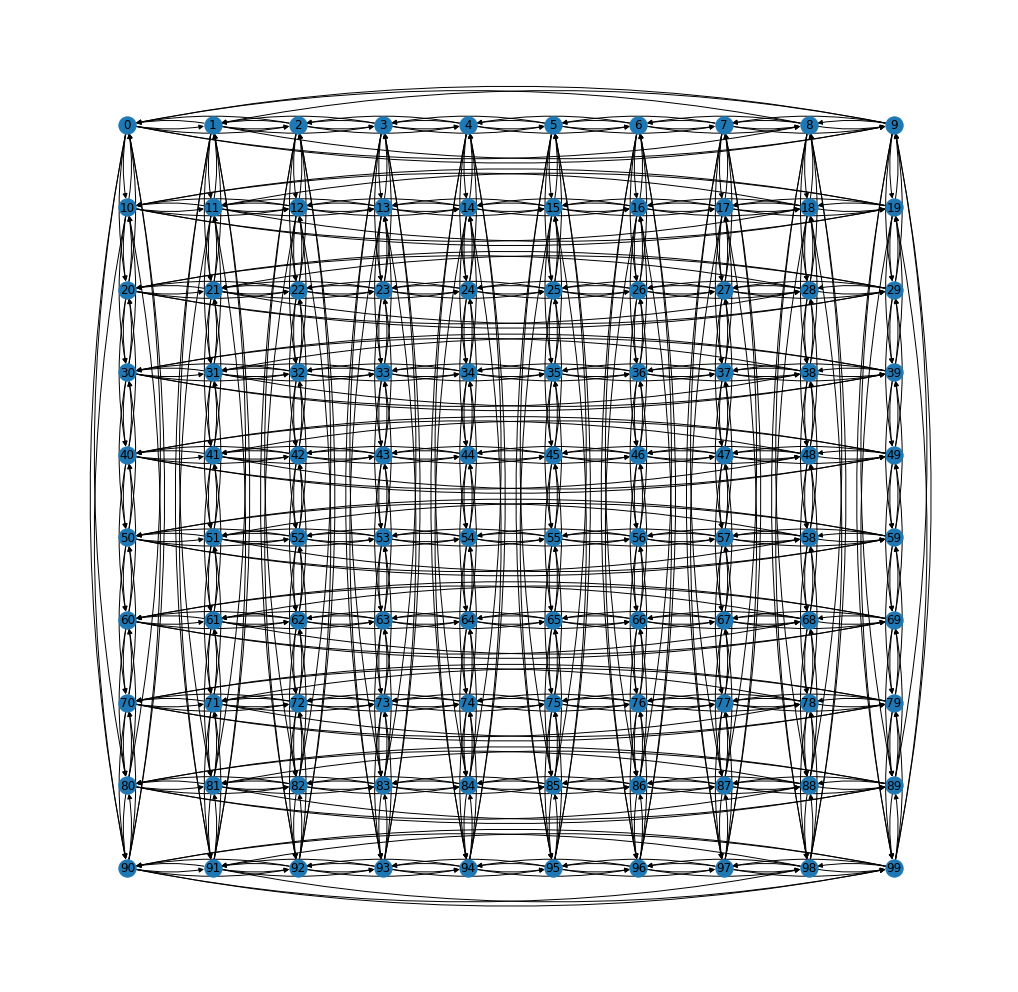

In [ ]:
def new_add_edge(G, a, b, d_rad=0.1):
    max_rad = 0
    G.add_edge(a, b, rad=max_rad+d_rad)
    
G = nx.DiGraph()  # create directed graph

for node in grid_2D:
    G.add_node(node)

for node in grid_2D:
    for neighbor in grid_2D[node]:
        new_add_edge(G, node, neighbor, 0.1)

plt.figure(figsize=(18,18))

grid_width = 10
pos = {x*grid_width + y: (y,-x) for x in range(grid_width) for y in range(grid_width)}

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)

for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0],edge[1])], connectionstyle=f'arc3, rad = {edge[2]["rad"]}')

a = plt.axis('off')

### Read Small-World graph $\omega=0.05$.

- The regular graph above is rewired and the result can be observed below.

In [ ]:
# reading the data from the file, omega=0.05
with open('../grid_w05.txt') as f:
    data = f.read()
      
# reconstructing the data as a dictionary
grid_sw = eval(data)

# reading the data from the file
with open('../rewired_arcs.txt') as f:
    data = f.read()
      
# reconstructing the data as a dictionary
rewired_arcs = eval(data)

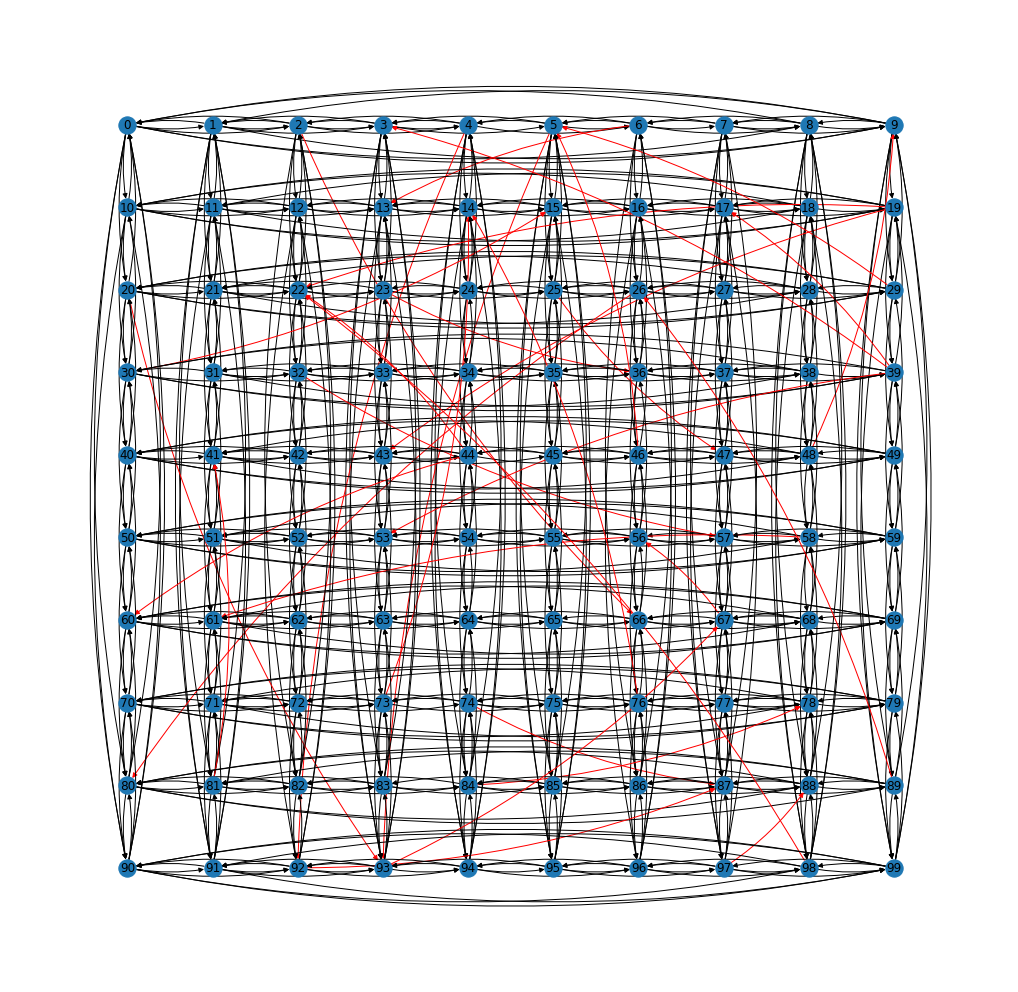

In [ ]:
G = nx.DiGraph()

for node in grid_sw:
    G.add_node(node)

for node in grid_sw:
    for neighbor in grid_sw[node]:
        new_add_edge(G, node, neighbor, 0.1)

plt.figure(figsize=(18,18))

grid_width = 10
pos = {x*grid_width + y: (y,-x) for x in range(grid_width) for y in range(grid_width)}

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)

for edge in G.edges(data=True):
    if (edge[0], edge[1]) in rewired_arcs:
        nx.draw_networkx_edges(G, pos, edgelist=[(edge[0],edge[1])], edge_color='r',
                               connectionstyle=f'arc3, rad = {edge[2]["rad"]}')
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[(edge[0],edge[1])], 
                               connectionstyle=f'arc3, rad = {edge[2]["rad"]}')

a = plt.axis('off')

<AxesSubplot:>

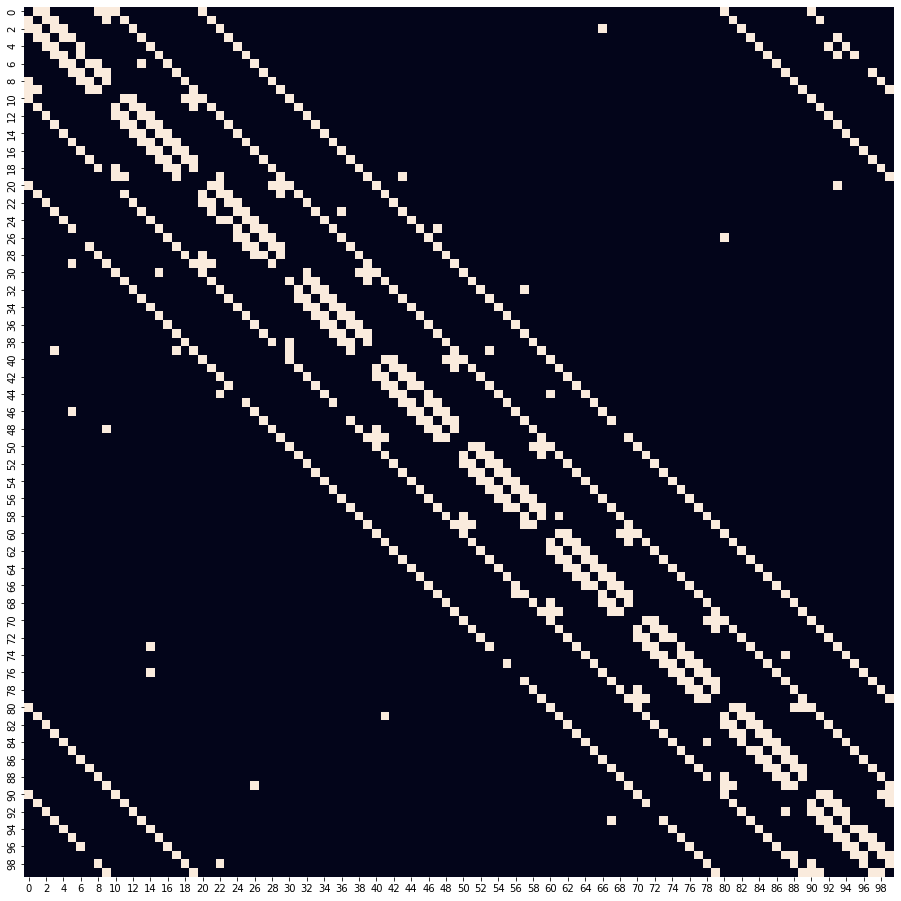

In [ ]:
C = np.zeros((len(grid_sw), len(grid_sw)), dtype='int')  # adjacency matrix

for node in grid_sw: 
    for neighbor in grid_sw[node]:
        C[node, neighbor] = 1
plt.figure(figsize=(16,16))
sns.heatmap(C, cbar=False, square=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>